args init finished
save_hyperparameters finished
create fwNet finished


/usr/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


create vgg finished
create feature_net finished
create trans finished
create style_features finished
create style_grams finished


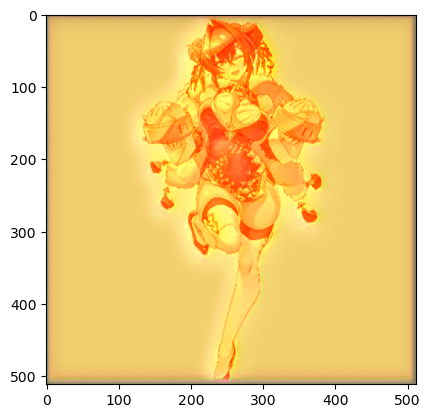

In [1]:
import models,utils,numpy,cv2
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

plt.ion()

tran1 = transforms.Compose([
            transforms.ToTensor(),
            transforms.Resize(512),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
to_numpy = transforms.Compose([
            transforms.Lambda(lambda x:utils.UnNormalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))(x)),
            transforms.Lambda(lambda x:x.clamp(0,1)),
            transforms.ToPILImage(),
            transforms.Lambda(lambda x:cv2.cvtColor(numpy.asarray(x),cv2.COLOR_RGB2BGR))
        ])
to_numpy2 = transforms.Compose([
            transforms.Lambda(lambda x:utils.UnNormalize((0.485, 0.456, 0.406),(0.229, 0.224, 0.225))(x)),
            transforms.Lambda(lambda x:x.clamp(0,1).data.numpy().transpose(1,2,0)),
        ])

net = models.FWNetModule.load_from_checkpoint('./data/lightning_logs/ImfwNet/version_4/checkpoints/epoch=9-step=2590.ckpt').eval()
img = Image.open('./data/MSNet/train/trans.jpg')
img = tran1(img)
target = net.fwNet(img)

t1 = to_numpy(target)
cv2.imshow('numpy 1',t1)
t2 = to_numpy2(target)
cv2.waitKey(15000)
cv2.destroyAllWindows()

plt.figure('test2')
plt.imshow(t2)
plt.pause(0.01)